In [1]:
import pandas as pd
import seaborn as sns
import plotly
import numpy as np

In [2]:
deli = pd.read_csv("delivery_time.csv")
deli.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
deli.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [4]:
deli.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


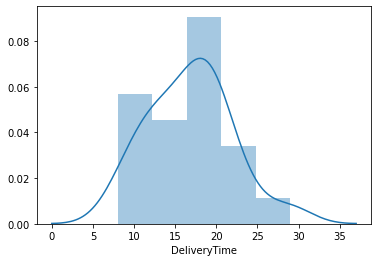

In [5]:
sns.distplot(deli['DeliveryTime'])

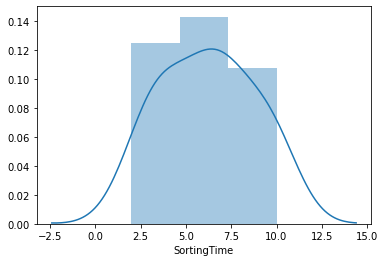

In [6]:
sns.distplot(deli['SortingTime'])

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols("SortingTime~DeliveryTime",data = deli).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        13:11:47   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model1 = smf.ols("SortingTime~np.log(DeliveryTime)",data=deli).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        13:11:49   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model1.resid

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [10]:
model2 = smf.ols("np.log(SortingTime)~DeliveryTime",data=deli).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Sat, 02 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                         13:11:51   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
deli["deli_sq"] = deli.DeliveryTime*deli.DeliveryTime
deli.shape

(21, 3)

In [13]:
model3 = smf.ols("SortingTime~deli_sq",data=deli).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.52e-05
Time:                        13:12:03   Log-Likelihood:                -39.186
No. Observations:                  21   AIC:                             82.37
Df Residuals:                      19   BIC:                             84.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8658      0.716      4.004      0.001       1.368       4.364
deli_sq        0.0108      0.002      5.368      0.000       0.007       0.015
==============================================================================
Omnibus:                        0.933   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.652
Skew:                           0.413   Prob(JB):                        0.722
Kurtosis:                       2.749   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model4 = smf.ols("SortingTime~((DeliveryTime))",data=deli).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        13:12:05   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
new_data = pd.DataFrame({'DeliveryTime':50},index=[1])

In [23]:
model1.predict(new_data)

1    13.850388
dtype: float64

In [24]:
pred_y = model1.predict(deli)

In [25]:
pred_y

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [26]:
model1.resid 
model1.resid_pearson

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])